In [1]:
import pickle
import json
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
num_tasks = 3
episodes, rewards = [], []
path = './log/CTgraph-v0-a2c-mas-pres_actor_and_critic_balnet-sep-pres/210909-225614/'

# load data
for i in range(1, num_tasks+1):
    episodes.append([])
    rewards.append([])
    print('i=', i)
    #for j in range(1, i+1):
    for j in range(i, (num_tasks+1)):
        print('{0}/episodes-task{1}_{2}.bin'.format(path, j, i), ', j=', j)
        with open('{0}/episodes-task{1}_{2}.bin'.format(path, j, i), 'rb') as f: episodes[-1].append(pickle.load(f))
        with open('{0}/rewards-task{1}_{2}.bin'.format(path, j, i), 'rb') as f: rewards[-1].append(pickle.load(f))

i= 1
./log/CTgraph-v0-a2c-mas-pres_actor_and_critic_balnet-sep-pres/210909-225614//episodes-task1_1.bin , j= 1
./log/CTgraph-v0-a2c-mas-pres_actor_and_critic_balnet-sep-pres/210909-225614//episodes-task2_1.bin , j= 2
./log/CTgraph-v0-a2c-mas-pres_actor_and_critic_balnet-sep-pres/210909-225614//episodes-task3_1.bin , j= 3
i= 2
./log/CTgraph-v0-a2c-mas-pres_actor_and_critic_balnet-sep-pres/210909-225614//episodes-task2_2.bin , j= 2
./log/CTgraph-v0-a2c-mas-pres_actor_and_critic_balnet-sep-pres/210909-225614//episodes-task3_2.bin , j= 3
i= 3
./log/CTgraph-v0-a2c-mas-pres_actor_and_critic_balnet-sep-pres/210909-225614//episodes-task3_3.bin , j= 3


In [3]:
# structure of rewards: num_tasks, num_task_evals, episode_idx
# structure of episodes: num_tasks, num_task_evals, episode_idx, ....(episode which is a dictionary)
num_episodes = len(episodes[0][0])
#pprint(episodes[0][0][0])

def process_data_vector(data, num_tasks, num_episodes, key):
    ret = [[] for _ in range(num_tasks)] # num_tasks, num_task_evals, num_episodes x episode_length
    for i in range(num_tasks):
        for j in range(num_tasks-i):
            values = []
            for k in range(num_episodes):
                values_ = episodes[i][j][k][key]
                values_ = [v.numpy().reshape(-1, ) for v in values_]
                values.append(values_)
            max_path_length = len(max(values, key=lambda v: len(v)))
            vec_dim = len(values[0][0])
            np_values = np.zeros((len(values), max_path_length, vec_dim), dtype=np.float32)
            for idx, v in enumerate(values):
                np_values[idx, 0 : len(v), : ] = v
            ret[i].append(np_values)
    return ret

def process_data_scalar(data, num_tasks, num_episodes, key):
    ret = [[] for _ in range(num_tasks)] # num_tasks, num_task_evals, num_episodes x episode_length
    for i in range(num_tasks):
        for j in range(num_tasks-i):
            values = []
            for k in range(num_episodes):
                values_ = episodes[i][j][k][key]
                values_ = [float(v) for v in values_]
                values.append(values_)
            max_path_length = len(max(values, key=lambda v: len(v)))
            np_values = np.zeros((len(values), max_path_length), dtype=np.float32)
            for idx, v in enumerate(values):
                np_values[idx, 0 : len(v)] = v
            ret[i].append(np_values)
    return ret

d = {}
d['value'] = process_data_scalar(episodes, num_tasks, num_episodes, 'value')
d['entropy'] = process_data_scalar(episodes, num_tasks, num_episodes, 'entropy')
d['logits'] = process_data_vector(episodes, num_tasks, num_episodes, 'logits')
d['sampled_action'] = process_data_scalar(episodes, num_tasks, num_episodes, 'sampled_action')
d['deterministic_action'] = process_data_scalar(episodes, num_tasks, num_episodes, 'deterministic_action')
d['log_prob'] = process_data_scalar(episodes, num_tasks, num_episodes, 'log_prob')
d['reward'] = process_data_scalar(episodes, num_tasks, num_episodes, 'reward')
d['terminal'] = process_data_scalar(episodes, num_tasks, num_episodes, 'terminal')
print('task1', d['value'][0][0].shape)
print('task2', d['value'][1][0].shape)
print('task3', d['value'][2][0].shape)

task1 (10, 7)
task2 (10, 7)
task3 (10, 7)


### after training on task 1, 2 and 3 respectively, average critic prediction (value function) on task 1

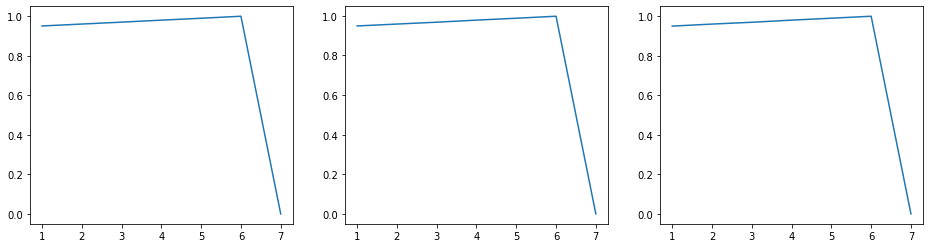

In [4]:
fig = plt.figure(figsize=(16, 4))
axs = fig.subplots(1, 3)
for idx, ax in enumerate(axs):    
    avg = d['value'][0][idx].mean(axis=0)
    ax.plot(np.arange(1, len(avg)+1), avg)

### after training on task 2 and 3 respectively, average critic prediction (value function) on task 2

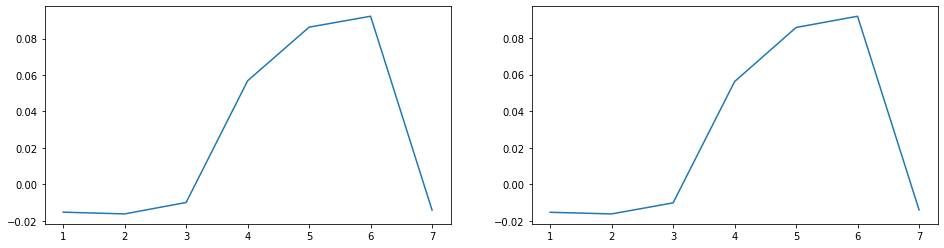

In [5]:
fig = plt.figure(figsize=(16, 4))
axs = fig.subplots(1, 2)
for idx, ax in enumerate(axs):    
    avg = d['value'][1][idx].mean(axis=0)
    ax.plot(np.arange(1, len(avg)+1), avg)

### after training on task 3 respectively, average critic prediction (value function) on task 3

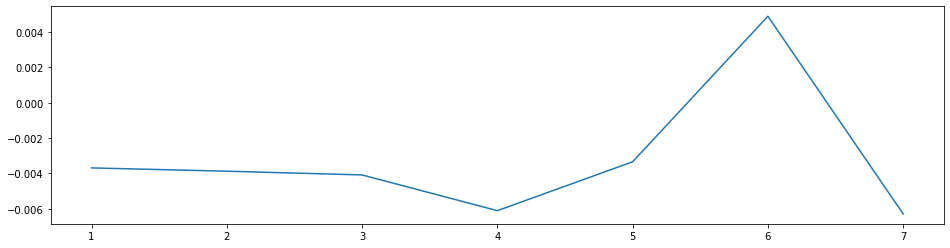

In [6]:
fig = plt.figure(figsize=(16, 4))
ax = fig.subplots()
avg = d['value'][2][0].mean(axis=0)
ax.plot(np.arange(1, len(avg)+1), avg)